In [17]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

 Q1: Text Preprocessing & Word Frequency



In [18]:
text = """Artificial Intelligence is transforming the world in many ways. 
It powers everything from virtual assistants to self-driving cars. 
I love learning about AI because it merges computer science and human intelligence. 
AI systems can improve healthcare, finance, and even education. 
It’s an exciting field with limitless potential."""

# 1. Lowercase + Remove punctuation
clean_text = re.sub(r'[^\w\s]', '', text.lower())
print("Cleaned Text:\n", clean_text)

# 2. Tokenization
words = word_tokenize(clean_text)
sentences = sent_tokenize(text)
print("\nWords:", words)
print("Sentences:", sentences)

# 3. split() vs word_tokenize()
print("\nsplit():", clean_text.split())
print("word_tokenize():", words)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]

# 5. Word Frequency Distribution
freq = Counter(filtered_words)
print("\nWord Frequency (without stopwords):", freq)


Cleaned Text:
 artificial intelligence is transforming the world in many ways 
it powers everything from virtual assistants to selfdriving cars 
i love learning about ai because it merges computer science and human intelligence 
ai systems can improve healthcare finance and even education 
its an exciting field with limitless potential

Words: ['artificial', 'intelligence', 'is', 'transforming', 'the', 'world', 'in', 'many', 'ways', 'it', 'powers', 'everything', 'from', 'virtual', 'assistants', 'to', 'selfdriving', 'cars', 'i', 'love', 'learning', 'about', 'ai', 'because', 'it', 'merges', 'computer', 'science', 'and', 'human', 'intelligence', 'ai', 'systems', 'can', 'improve', 'healthcare', 'finance', 'and', 'even', 'education', 'its', 'an', 'exciting', 'field', 'with', 'limitless', 'potential']
Sentences: ['Artificial Intelligence is transforming the world in many ways.', 'It powers everything from virtual assistants to self-driving cars.', 'I love learning about AI because it merges 

Q2: Regex, Stopword Removal, Stemming & Lemmatization

In [19]:
# 1. Extract alphabet words
alpha_words = re.findall(r'\b[a-zA-Z]+\b', clean_text)
print("\nAlphabet-only words:", alpha_words)

# 2. Remove stopwords
filtered_alpha = [w for w in alpha_words if w not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_alpha]

print("\nStemmed Words:", stemmed)
print("Lemmatized Words:", lemmatized)

# 5. Comparison
print("\nStemming gives base forms but may not be real words. Lemmatization returns dictionary words. Prefer lemmatization for NLP tasks.")



Alphabet-only words: ['artificial', 'intelligence', 'is', 'transforming', 'the', 'world', 'in', 'many', 'ways', 'it', 'powers', 'everything', 'from', 'virtual', 'assistants', 'to', 'selfdriving', 'cars', 'i', 'love', 'learning', 'about', 'ai', 'because', 'it', 'merges', 'computer', 'science', 'and', 'human', 'intelligence', 'ai', 'systems', 'can', 'improve', 'healthcare', 'finance', 'and', 'even', 'education', 'its', 'an', 'exciting', 'field', 'with', 'limitless', 'potential']

Stemmed Words: ['artifici', 'intellig', 'transform', 'world', 'mani', 'way', 'power', 'everyth', 'virtual', 'assist', 'selfdriv', 'car', 'love', 'learn', 'ai', 'merg', 'comput', 'scienc', 'human', 'intellig', 'ai', 'system', 'improv', 'healthcar', 'financ', 'even', 'educ', 'excit', 'field', 'limitless', 'potenti']
Lemmatized Words: ['artificial', 'intelligence', 'transforming', 'world', 'many', 'way', 'power', 'everything', 'virtual', 'assistant', 'selfdriving', 'car', 'love', 'learning', 'ai', 'merges', 'compu

 Q3: BoW & TF-IDF

In [20]:
texts = [
    "The phone has a great camera and battery life.",
    "The laptop is slow and the screen is dull.",
    "I love the sound quality but the touchpad is bad."
]

# 1. CountVectorizer (BoW)
cv = CountVectorizer()
bow = cv.fit_transform(texts).toarray()
print("\nBag of Words Matrix:\n", bow)
print("Vocabulary:", cv.get_feature_names_out())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts).toarray()
features = tfidf.get_feature_names_out()

# 3. Top 3 Keywords
for i, row in enumerate(tfidf_matrix):
    top_indices = np.argsort(row)[::-1][:3]
    print(f"\nTop 3 Keywords in Text {i+1}:")
    for idx in top_indices:
        print(f"{features[idx]}: {row[idx]:.3f}")



Bag of Words Matrix:
 [[1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0]
 [1 0 0 0 0 1 0 0 2 1 0 0 0 0 1 1 0 2 0]
 [0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 2 1]]
Vocabulary: ['and' 'bad' 'battery' 'but' 'camera' 'dull' 'great' 'has' 'is' 'laptop'
 'life' 'love' 'phone' 'quality' 'screen' 'slow' 'sound' 'the' 'touchpad']

Top 3 Keywords in Text 1:
has: 0.380
battery: 0.380
camera: 0.380

Top 3 Keywords in Text 2:
is: 0.528
the: 0.410
laptop: 0.347

Top 3 Keywords in Text 3:
the: 0.418
touchpad: 0.354
sound: 0.354


Q4: Similarity – Jaccard & Cosine



In [21]:
text1 = "Artificial Intelligence is changing healthcare and finance."
text2 = "Blockchain brings decentralization and transparency to finance."

# Preprocess
def preprocess(text):
    return [w for w in word_tokenize(text.lower()) if w.isalpha() and w not in stop_words]

set1 = set(preprocess(text1))
set2 = set(preprocess(text2))

# a. Jaccard Similarity
jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("\nJaccard Similarity:", jaccard_sim)

# b. Cosine Similarity
tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform([text1, text2])
cosine_sim = cosine_similarity(matrix[0:1], matrix[1:2])[0][0]
print("Cosine Similarity:", cosine_sim)

# c. Analysis
print("\nCosine Similarity captures importance using weights, better for context-rich comparison.")



Jaccard Similarity: 0.1111111111111111
Cosine Similarity: 0.16839750037215276

Cosine Similarity captures importance using weights, better for context-rich comparison.


Q5: Sentiment Analysis & WordCloud


Review: I love this phone, the battery is amazing.
Polarity: 0.55, Subjectivity: 0.75, Sentiment: Positive

Review: Terrible service, I will never come back.
Polarity: -0.50, Subjectivity: 0.50, Sentiment: Negative

Review: The product is okay, not the best but not the worst.
Polarity: 0.17, Subjectivity: 0.60, Sentiment: Positive


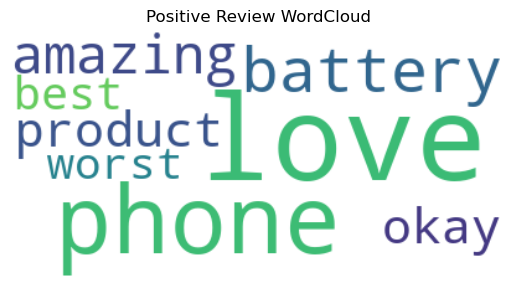

In [22]:
reviews = [
    "I love this phone, the battery is amazing.",
    "Terrible service, I will never come back.",
    "The product is okay, not the best but not the worst."
]

positive_words = []

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"\nReview: {review}")
    print(f"Polarity: {polarity:.2f}, Subjectivity: {subjectivity:.2f}, Sentiment: {sentiment}")
    if sentiment == "Positive":
        positive_words.extend(blob.words)

# WordCloud
text = " ".join(positive_words)
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Review WordCloud")
plt.show()


Q6: Text Generation with LSTM

In [24]:
train_text = "AI is transforming every aspect of life. It helps in automation, personalization and efficiency. The future is shaped by intelligent systems."

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([train_text])
seq = tokenizer.texts_to_sequences([train_text])[0]
vocab_size = len(tokenizer.word_index) + 1

# Create sequences
sequences = []
for i in range(3, len(seq)):
    sequences.append(seq[i-3:i+1])
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]

# Build model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(64))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=500, verbose=0)

# Text Generation
seed = ['ai', 'is', 'transforming']
for _ in range(5):
    encoded = tokenizer.texts_to_sequences([' '.join(seed[-3:])])[0]
    encoded = pad_sequences([encoded], maxlen=3)
    pred = np.argmax(model.predict(encoded, verbose=0))
    for word, index in tokenizer.word_index.items():
        if index == pred:
            seed.append(word)
            break

print("\nGenerated Text:\n", ' '.join(seed))



Generated Text:
 ai is transforming every aspect of life it
